In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.colors as colors
import scipy.io

<Axes: >

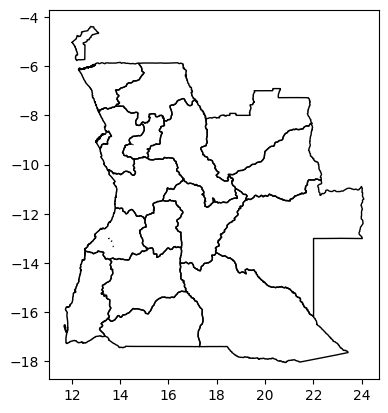

In [13]:
shp_path = "../data/external/Angola_provinces/SDE_DATA_AO_F7PROVINCES_2005.shp"
shp = gpd.read_file(shp_path)
shp.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1)

In [3]:
type(shp.geometry.values[0]), shp.crs, shp.total_bounds

(shapely.geometry.multipolygon.MultiPolygon,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 array([ 11.66847324, -18.04208183,  24.08211708,  -4.37259102]))

In [4]:
tif_sample1 = "../data/processed/weekly_drought_labels/2015_04_20.tif"
with rio.open(tif_sample1) as src:
    sm = src.read(1)
    bounds = src.bounds
    crs = src.crs
sm.shape, bounds, crs

((189, 133),
 BoundingBox(left=11.716805458068848, bottom=-17.973846435546875, right=24.040456771850586, top=-4.4174346923828125),
 CRS.from_epsg(4326))

# Visualize TIFF file

In [14]:
def viz_tiff(date):
    tif_sample = f"../data/processed/weekly_drought_labels/{date}.tif"
    with rio.open(tif_sample) as src:
        sm = src.read(1)
        bounds = src.bounds
        crs = src.crs
    fig = plt.figure(figsize=(10, 10))
    img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857)) 

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                    alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                    xlabel_style={'size': 14}) #TODO: insert line styles later

    gl.xlabels_bottom = False
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right = False

    plot = ax.imshow(sm, cmap='GnBu', extent=img_extent)
    shp.geometry.boundary.plot(ax=ax, color='black', linewidth = 1)

    cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
    cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('RZSM', fontsize=18)

    fig.suptitle(f'{date}', fontsize=20)

    plt.savefig(f'../results/figures/{date}.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated.

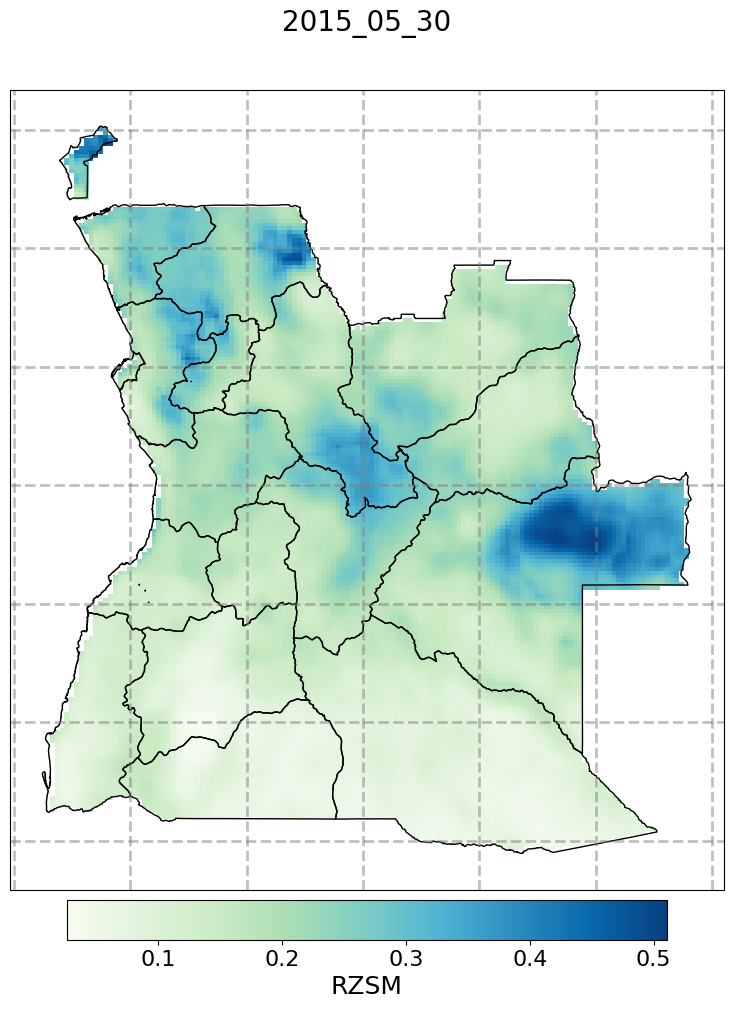

In [15]:
viz_tiff('2015_05_30')

## Visualize TIFF (Monthly)

In [16]:
# Let's create a colormap with 5 colors, to match the drought levels (USDM)
custom_colors = [
    "white",
    "yellow",
    "#FFDAB9",
    "orange",
    "red",
    "darkred",
]
cmap = colors.ListedColormap(custom_colors)

In [19]:
def viz_tiff_monthly(date):
    tif_sample = f"../data/processed/monthly_drought_labels/{date}.tif"
    with rio.open(tif_sample) as src:
        label = src.read(1)
        bounds = src.bounds
        crs = src.crs
    fig = plt.figure(figsize=(10, 10))
    img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857)) 

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                    alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                    xlabel_style={'size': 14}) #TODO: insert line styles later

    gl.xlabels_bottom = False
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right = False

    plot = ax.imshow(label, cmap=cmap, extent=img_extent)
    shp.geometry.boundary.plot(ax=ax, color='black', linewidth = 1)

    cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
    cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('USDM Drought Categories', fontsize=18)
    cbar.set_ticklabels(['None', 'D0','D1','D2','D3','D4'])
    cbar.set_ticks(np.linspace(0.35,3.65,6))

    fig.suptitle(f'{date}', fontsize=20)

    plt.savefig(f'../results/figures/{date}.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated.

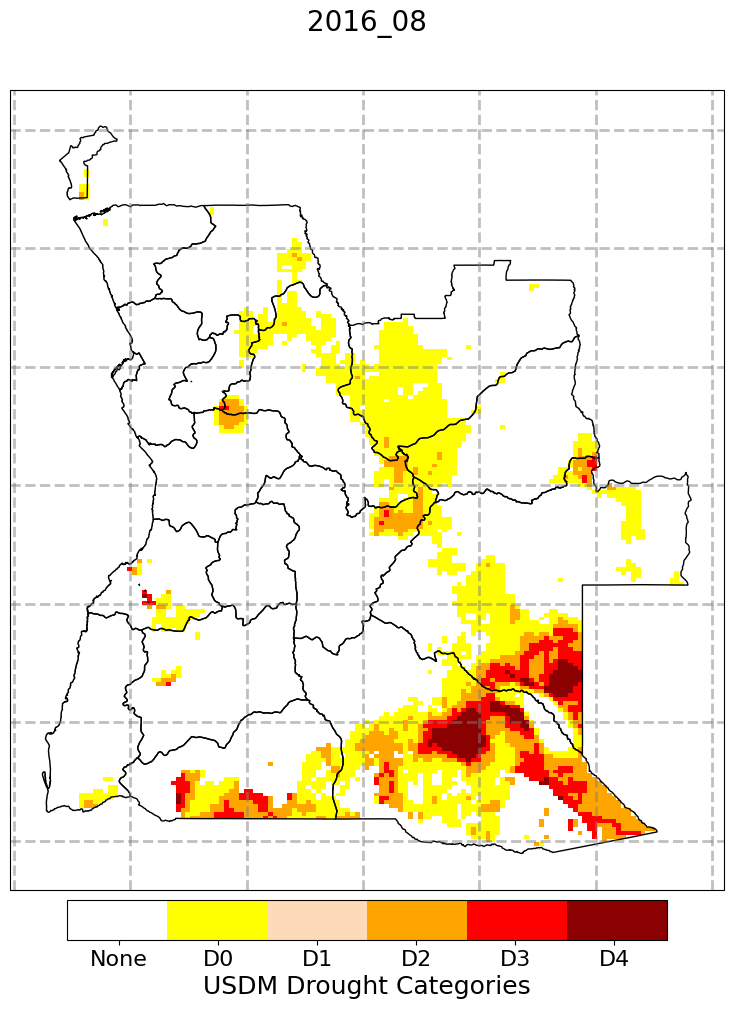

In [20]:
viz_tiff_monthly('2016_08')

# Porosity data
We have to convert the `porosity_9km.mat` file to numpy array

In [22]:
mat1 = scipy.io.loadmat('../data/raw/porosity/porosityAfrica.mat')
mat2 = scipy.io.loadmat('../data/raw/porosity/porosityAngola.mat')

In [23]:
porosity_africa = mat1['porosityAfrica']
porosity_angola = mat2['porosityAngola']
# porosity_africa
# porosity_angola

In [24]:
porosity_angola.shape

(189, 133)

## Check the contents of the MATLAB files (porosity for Africa and Angola)

C:\Users\esl26\AppData\Local\Temp\ipykernel_35204\3575880804.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


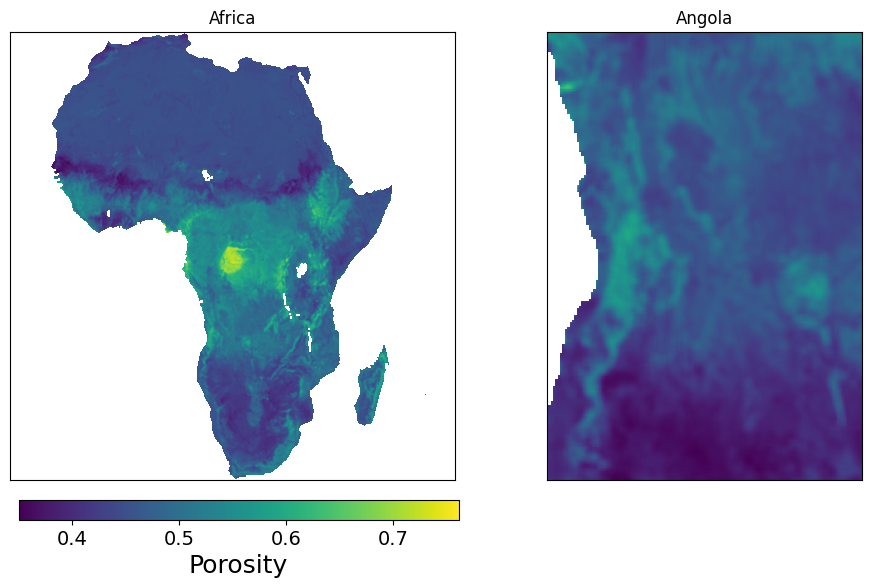

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot1 = axes[0].imshow(porosity_africa)
axes[0].set_title('Africa')
axes[0].set_xticks([])
axes[0].set_yticks([])

plot2 = axes[1].imshow(porosity_angola)
axes[1].set_title('Angola')
axes[1].set_xticks([])
axes[1].set_yticks([])

cbar_ax = fig.add_axes([0.05, -0.05, 0.44, 0.04])
cbar = plt.colorbar(plot1, cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Porosity', fontsize=18)
fig.tight_layout()
fig.savefig('../results/figures/porosity_africa_angola.png', dpi=300, bbox_inches='tight')

## Check the porosity in Angola

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


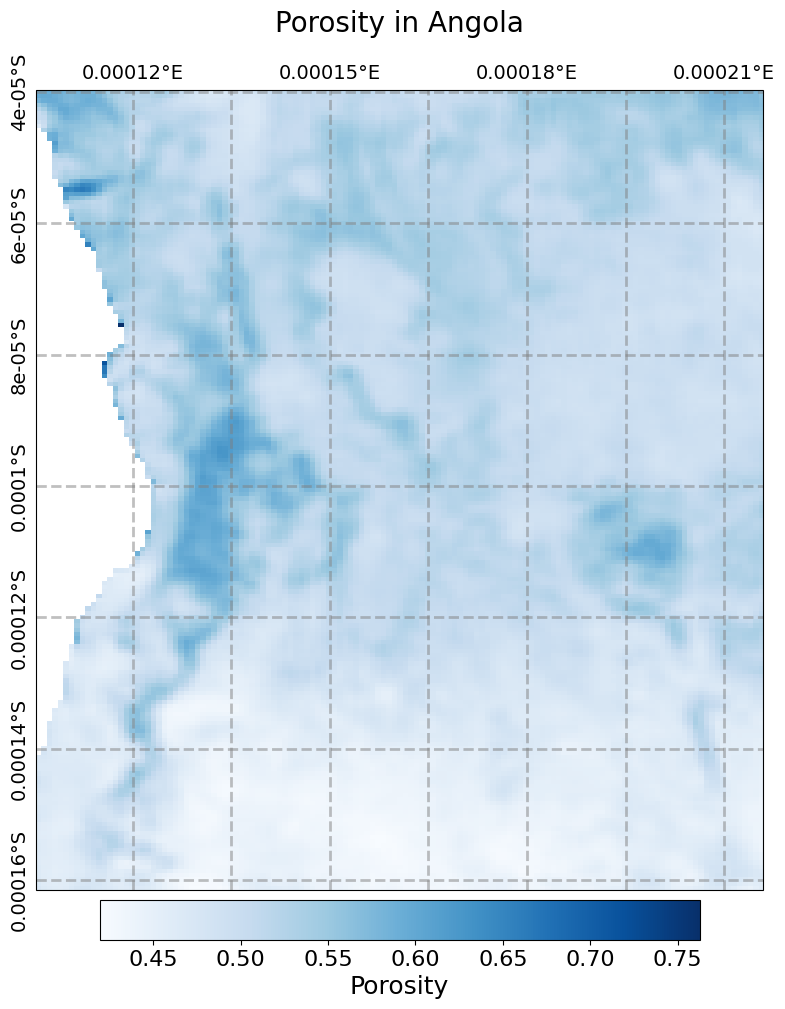

In [27]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857)) 

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14}) #TODO: insert line styles later

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = ax.imshow(porosity_angola, cmap='Blues', extent=img_extent)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Porosity', fontsize=18)

fig.suptitle("Porosity in Angola", fontsize=20)

plt.savefig(f'../results/figures/porosity_angola.png', dpi=300, bbox_inches='tight')

# Drought Severity Index

Starting with the file, `RZSM_withDroughtLabels_Angola_8day.mat`

## Zonal Statistics

In [29]:
from rasterstats import zonal_stats
raster_path = "../data/processed/monthly_drought_labels/2016_08.tif"

In [30]:
with rio.open(raster_path) as src:
    bounds = src.bounds
    crs = src.crs
    drought_labels = src.read(1)
boundaries = gpd.read_file(shp_path)
boundaries = boundaries.to_crs(crs)

In [31]:
boundaries

,NAME,SHPAREASQM,CODE_PROV,geometry
0,Bengo,3.799123e+10,01,"MULTIPOLYGON (((13.12321 -7.83117, 13.12409 -7..."
1,Benguela,3.954707e+10,02,"MULTIPOLYGON (((12.53478 -13.49164, 12.53566 -..."
2,Bié,7.214479e+10,03,"POLYGON ((16.51990 -12.92742, 16.51794 -12.921..."
3,Cabinda,6.975749e+09,04,"POLYGON ((12.71099 -4.46888, 12.71347 -4.46740..."
4,Kuando Kubango,1.997968e+11,05,"POLYGON ((22.23646 -16.57306, 22.26215 -16.575..."
5,Kwanza Norte,2.029464e+10,06,"POLYGON ((14.54237 -9.77922, 14.53348 -9.77422..."
6,Kwanza Sul,5.539526e+10,07,"POLYGON ((15.26511 -9.79956, 15.27292 -9.79810..."
7,Kunene,7.735317e+10,08,"POLYGON ((16.29437 -17.38978, 15.38930 -17.386..."
8,Huambo,3.318300e+10,09,"POLYGON ((16.32605 -11.60639, 16.32709 -11.611..."
9,Huíla,7.874020e+10,10,"POLYGON ((15.54472 -13.76052, 15.56128 -13.756..."


In [32]:
stats = zonal_stats(boundaries, drought_labels, affine=src.transform, categorical=True)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


Plot the class in a province using a bar graph

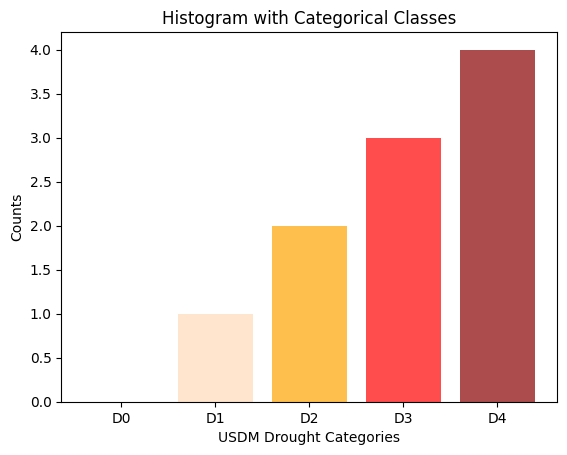

In [33]:
fig, ax = plt.subplots()

# Define the positions of the bars on the x-axis
x_pos = np.arange(5)

# Create the bars
ax.bar(x_pos, stats[4], align='center', alpha=0.7, color=["yellow", "#FFDAB9", "orange","red", "darkred"])

# Add labels to the x-axis
ax.set_xticks(x_pos)
ax.set_xticklabels(['D0', 'D1', 'D2', 'D3', 'D4'])

# Add a title and labels to the axes
ax.set_title('Histogram with Categorical Classes')
ax.set_xlabel('USDM Drought Categories')
ax.set_ylabel('Counts')

# Show the plot
plt.show()

In [34]:
stats

[{},
 {0.0: 43, 1.0: 53, 2.0: 7, 3.0: 7, 4.0: 1},
 {0.0: 62, 1.0: 54, 2.0: 60, 3.0: 3},
 {0.0: 11, 1.0: 7, 2.0: 1},
 {0.0: 167, 1.0: 547, 2.0: 448, 3.0: 229, 4.0: 127},
 {0.0: 31, 1.0: 35, 2.0: 1, 3.0: 1},
 {0.0: 12, 1.0: 17, 2.0: 17},
 {0.0: 31, 1.0: 160, 2.0: 122, 3.0: 60, 4.0: 3},
 {},
 {0.0: 73, 1.0: 16, 2.0: 6, 3.0: 1},
 {},
 {0.0: 327, 1.0: 475, 2.0: 6},
 {0.0: 253, 1.0: 175, 2.0: 10},
 {0.0: 201, 1.0: 251, 2.0: 38, 3.0: 1},
 {0.0: 391, 1.0: 500, 2.0: 152, 3.0: 154, 4.0: 56},
 {0.0: 1, 1.0: 26, 2.0: 5},
 {0.0: 187, 1.0: 63, 2.0: 2},
 {0.0: 7, 1.0: 2}]